In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error, median_absolute_error
import os
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

In [2]:
# use absolute path to retrieve datasets

train = pd.read_csv(os.path.abspath('./datasets/cleaned_train.csv'))
# sample = pd.read_csv(os.path.abspath('./datasets/sample_sub_reg.csv'))

[source for absolute path](https://stackoverflow.com/questions/51520/how-to-get-an-absolute-file-path-in-python)

In [3]:
train.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,total_baths,bsmt_finished,size_n_qual,bed_n_bath,fin_bsmt_fin_qual,bsmt_fin_n_ceiling,bsmt_finished_with_bath,bsmt_finished_with_halfbath,bsmt_size_fin_sf,overall_qual_cond
0,109,60,RL,77.504886,13517,2,3,4,4,CulDSac,...,3.0,533.0,8874,9.0,2665.0,533.0,0.0,0.0,386425.0,48
1,544,60,RL,43.000000,11492,2,3,4,4,CulDSac,...,4.0,637.0,14854,16.0,3185.0,1274.0,637.0,0.0,581581.0,35
2,153,20,RL,68.000000,7922,2,4,4,4,Inside,...,2.0,731.0,5285,6.0,3655.0,731.0,731.0,0.0,772667.0,35
3,318,60,RL,73.000000,9802,2,4,4,4,Inside,...,3.0,0.0,7220,9.0,0.0,0.0,0.0,0.0,0.0,25
4,255,50,RL,82.000000,14235,2,3,4,4,Inside,...,2.0,0.0,8670,6.0,0.0,0.0,0.0,0.0,0.0,48


In [4]:
train.columns

Index(['id', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars',
       

In [5]:
drop_lst = []
drop_lst.extend(['pool_area',  #not applicable to most homes
                'enclosed_porch',
                '3ssn_porch',
                'screen_porch',
                'garage_yr_blt',
                'functional',
               'low_qual_fin_sf',
                'garage_qual',
                'paved_drive', 
                'central_air',
                'bsmtfin_sf_2',
                'kitchen_abvgr',
               'utilities',
               'land_slope', 
               'lot_area',
               'street',
               'land_slope', 
                'yr_sold',
                'bsmtfin_type_2',
                 'bsmtfin_sf_2',
                'exterior_2nd',
                'heating',
                'electrical','condition_1', 
                 'condition_2']) 

In [6]:
best_lasso_features = ['lot_area',
 'bsmt_fin_n_ceiling',
 'functional',
 'total_bsmt_sf',
 'overall_cond',
 'year_built',
 'overall_qual',
 'gr_liv_area']

# Baseline

In [7]:
# perserving baseline from first model attempt
baseline = train['saleprice'].mean()
baseline_list = [baseline for i in range(2049)]
baseline_score = r2_score(train['saleprice'], baseline_list)
baseline_score

0.0

# Prepping for the model

In [8]:
train.columns

Index(['id', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars',
       

In [9]:
# making list of training feature names

features = [c for c in best_lasso_features if 
            (c != 'saleprice') & (c != 'id') & (c not in drop_lst)]

y = train['saleprice']

In [10]:
X = train[set(features)]

y = train['saleprice']

In [11]:
X.head()

,bsmt_fin_n_ceiling,gr_liv_area,overall_qual,year_built,total_bsmt_sf,overall_cond
0,533.0,1479,6,1976,725.0,8
1,1274.0,2122,7,1996,913.0,5
2,731.0,1057,5,1953,1057.0,7
3,0.0,1444,5,2006,384.0,5
4,0.0,1445,6,1900,676.0,8


In [12]:
X.columns

Index(['bsmt_fin_n_ceiling', 'gr_liv_area', 'overall_qual', 'year_built',
       'total_bsmt_sf', 'overall_cond'],
      dtype='object')

## Train Test Split

In [13]:
# finding missing columns in test vs train data
def find_missing_test_columns(train, test):
    return [col for col in train.columns if col not in test.columns]

In [14]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
find_missing_test_columns(X_train, X_test)

[]

# Instantiate Models

In [16]:
lr = LinearRegression(n_jobs = -1)

## Cross Validation

In [17]:
# over/underfitting?

cross_val_score(lr, X_train, y_train, cv = 5)

array([0.87072524, 0.88450822, 0.81712107, 0.86377115, 0.80323215])

In [18]:
baseline_previous = (0.89426015, 0.89282737, 0.85105365, 0.89859521, 0.86169427)

In [19]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)
lr_scores.mean()

0.8492729556349173

# Model Fitting and Evaluation

In [20]:
lr_model = lr.fit(X_train, y_train)

In [21]:
lr_score = lr_model.score(X_train, y_train)
print(f'lr Train: {lr_score}')

lr Train: 0.853230531135041


In [22]:
lr_test_score = lr_model.score(X_test, y_test)
print(f'lr Test: {lr_test_score}')

lr Test: 0.8553773787197391


In [23]:
lr_pred = lr_model.predict(X_test)

In [24]:
r2_score(y_test, lr_pred)

0.8553773787197391

# Metrics

In [25]:
def many_metrics(y_true, y_pred): # where p is # features used
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print('Mean squared error:          =', mse)
    print('Root mean squared error:     =', rmse)
    print('Mean absolute error:         =', mae)
    print('Median absolute error:       =', medae)
    print('R^2:                         =', r2)

[source](https://git.generalassemb.ly/DSIR-412/breakfast-hour/blob/master/lab-reviews/03-linear-regression-labs/Lab_Review_Week_3_FILLED.ipynb)

In [26]:
many_metrics(y_test, lr_pred)

Mean squared error:          = 914320779.9584695
Root mean squared error:     = 30237.73767923899
Mean absolute error:         = 21366.382234661414
Median absolute error:       = 16258.623733592336
R^2:                         = 0.8553773787197391


## Interpretating the Metrics

# Plotting Model and Residuals

In [27]:
lr_residuals = y_test - lr_pred

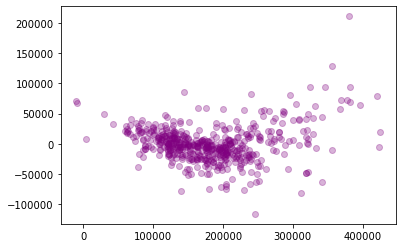

In [28]:
plt.scatter(lr_pred, lr_residuals, 
           c = 'purple', alpha = .3);

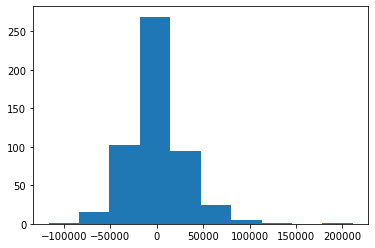

In [29]:
plt.hist(lr_residuals);

# Coefficients and Intercept

In [30]:
lr_coef = lr_model.coef_
lr_coef

array([   17.1489125 ,    63.47350637, 16702.67957242,   442.15666727,
          26.79542986,  5607.30083804])

In [31]:
X.columns

Index(['bsmt_fin_n_ceiling', 'gr_liv_area', 'overall_qual', 'year_built',
       'total_bsmt_sf', 'overall_cond'],
      dtype='object')

In [32]:
coef_df = pd.DataFrame({'feature': X.columns,
              'coef': lr_coef})

coef_df[(coef_df['coef'] == 0)].sort_values('coef')


,feature,coef


In [33]:
coef_df.sort_values('coef')

,feature,coef
0,bsmt_fin_n_ceiling,17.148912
4,total_bsmt_sf,26.795430
1,gr_liv_area,63.473506
3,year_built,442.156667
5,overall_cond,5607.300838
2,overall_qual,16702.679572


**Interpretation**

Everything else being held equal, if a house's overall quality increases by 1 unit (on a scale of 0-10 quality), the house's value will increase by \\$16703, overall condition on the same scale has a lesser impact. 

It does seem that, after seelcting the best features from Lasso, features having to do with quality and size have the most impact on the houses' value.

# Further EDA For Presentation

In [34]:
train['year_built'].max()

2010

In [35]:
train['overall_cond'].max()

9

In [36]:
train['overall_qual'].max()

10

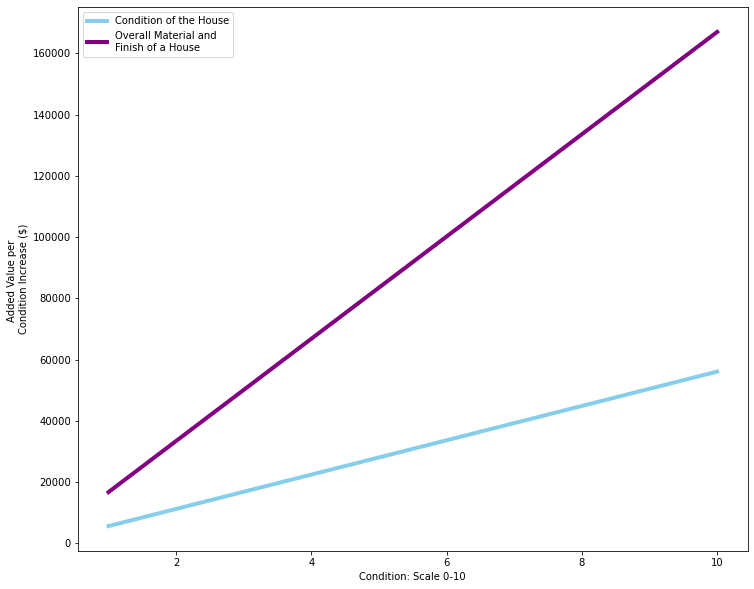

In [37]:
# Data
df=pd.DataFrame({'x_values': range(1,11),
                 'Condition of the House': [(5607*i) for i in range(1,11)], 
                 'Overall Material and \nFinish of a House':[16702*i for i in range(1,11)]})

# bigger plt
plt.figure(figsize = (12, 10))

# multiple line plots
plt.plot( 'x_values', 'Condition of the House', data=df, marker='',
         markerfacecolor='purple', markersize=12, color='skyblue',
         linewidth=4)
plt.plot( 'x_values', 'Overall Material and \nFinish of a House',
         data=df, marker='', color='purple', linewidth=4)
# show legend
plt.legend()
plt.xlabel('Condition: Scale 0-10')
plt.ylabel('Added Value per \nCondition Increase ($)')


# show graph
plt.show()

**Interpretation**

We can see that material and finish (the look and strength) of a house has a higher effect on the price of the house, when both material/finish and overall condition are compared. 

[source](https://www.python-graph-gallery.com/122-multiple-lines-chart)